# AMAZON SALES PREDICTION 

Sivapriya M.S

 Entri Elevate

DATE : 17/08/2024

## Overview

This project aims to develop a predictive model to predict sales of each category products 

## Objective

To develop sales prediction model using machine learning techniques

## DATA

 Dataset Source:https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

E-Commerce Sales Dataset  is designed for analyzing e-commerce sales data, potentially helping to unlock insights and profitability in online retail.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

df = pd.read_csv("Amazon Sale Report.csv")



C:\Users\lenovo\AppData\Local\Temp\ipykernel_10928\3748826233.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


In [24]:
df.head()



,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [26]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

<Axes: >

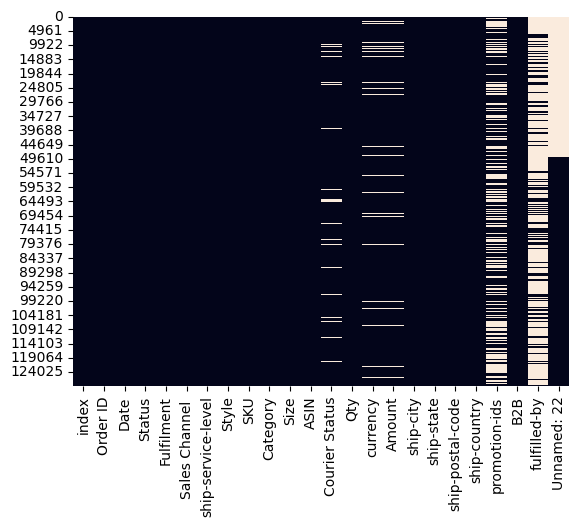

In [28]:
sns.heatmap(df.isnull(),cbar=False)

In [29]:
null_columns = df.columns[df.isnull().any()]
print('Columns contain null values : ')
print()
for col in null_columns:
    print(col)

Columns contain null values : 

Courier Status
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
fulfilled-by
Unnamed: 22


In [30]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [31]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [32]:
df.describe()


,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,272.581240,191452.267223
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,459.000000,382421.000000
50%,64487.000000,1.000000,635.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [33]:
df.duplicated().sum()


0

In [34]:
df.shape

(128975, 24)

In [35]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [36]:
df = df.drop(columns = ['index' , 'Order ID', 'Unnamed: 22', 'ship-postal-code', 'promotion-ids'], axis = 1)
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by
0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False,Easy Ship
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False,Easy Ship
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True,Easy Ship
3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False,Easy Ship


In [37]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-country', 'B2B',
       'fulfilled-by'],
      dtype='object')

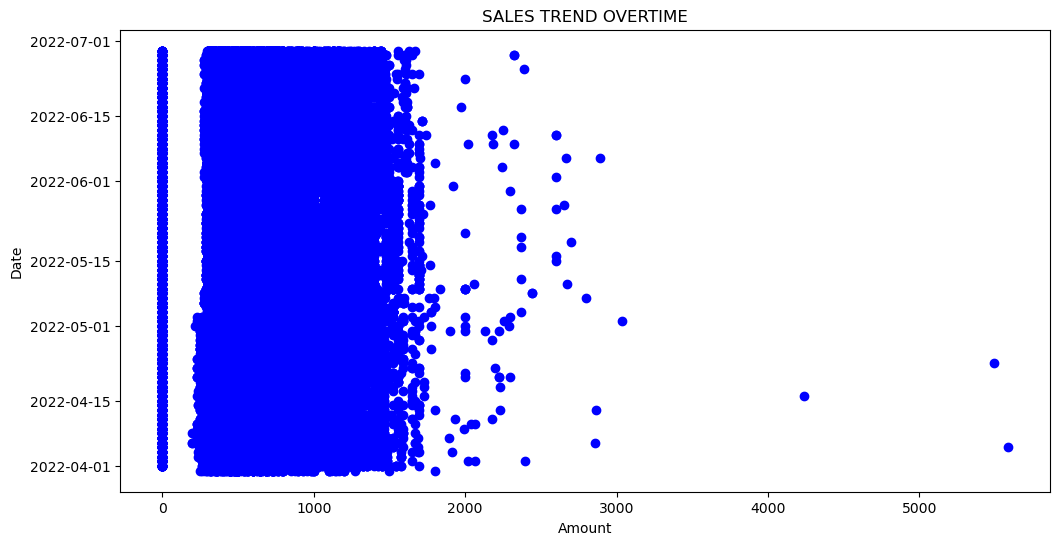

In [38]:
plt.figure(figsize=(12,6))
plt.scatter( df['Amount'],df['Date'],color='blue', marker='o')
plt.title('SALES TREND OVERTIME')
plt.xlabel('Amount')
plt.ylabel('Date')
plt.show()

<Axes: >

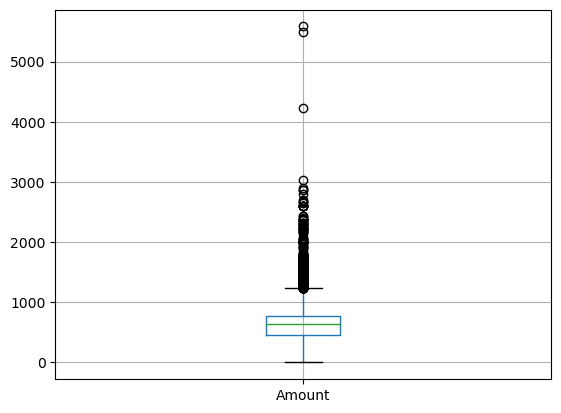

In [39]:
df[['Amount']].boxplot()


In [43]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
num_outliers = outliers.shape[0]
print(num_outliers)





4177


In [46]:
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

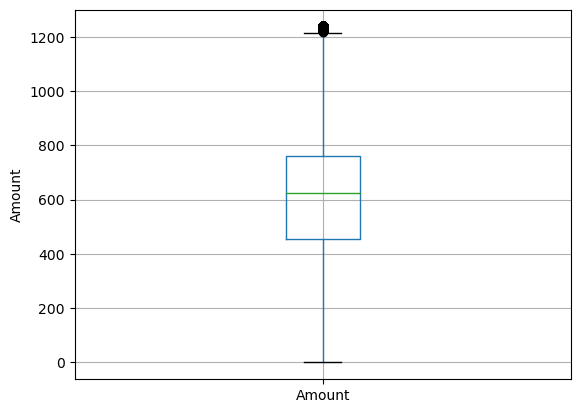

In [47]:
import matplotlib.pyplot as plt


df[['Amount']].boxplot()

plt.ylabel('Amount')
plt.show()


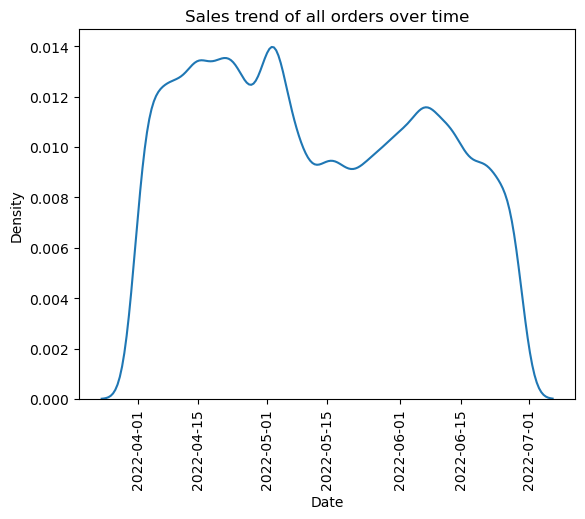

In [48]:
sns.kdeplot(data=df,x="Date")
plt.xticks(rotation=90)
plt.title('Sales trend of all orders over time')
plt.show()

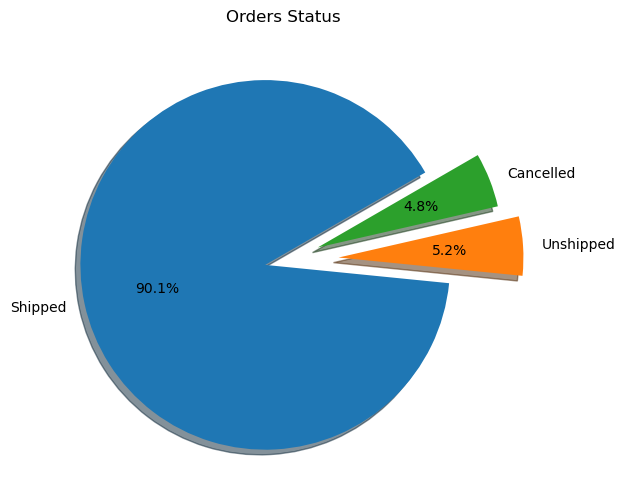

In [49]:
Status_count = df['Courier Status'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%',
        startangle=30,explode=(0.1,0.3,0.2),shadow=True)

plt.title('Orders Status')
plt.show()

In [50]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

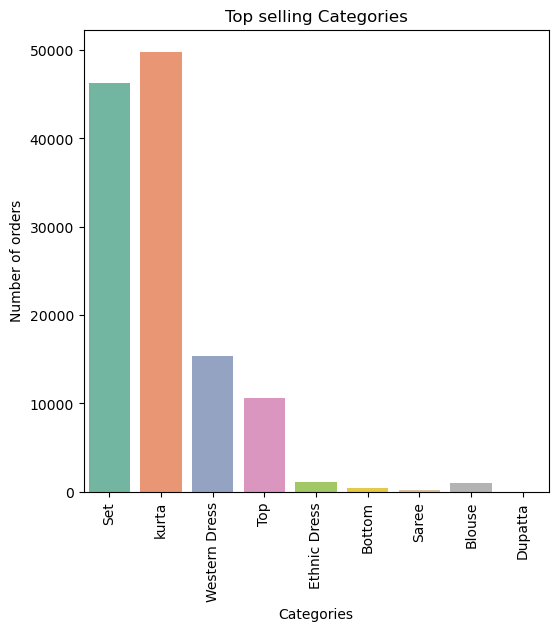

In [51]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Category'],data=df,palette='Set2')

plt.xlabel('Categories')
plt.ylabel('Number of orders')
plt.title('Top selling Categories')
plt.xticks(rotation=90)

plt.show()

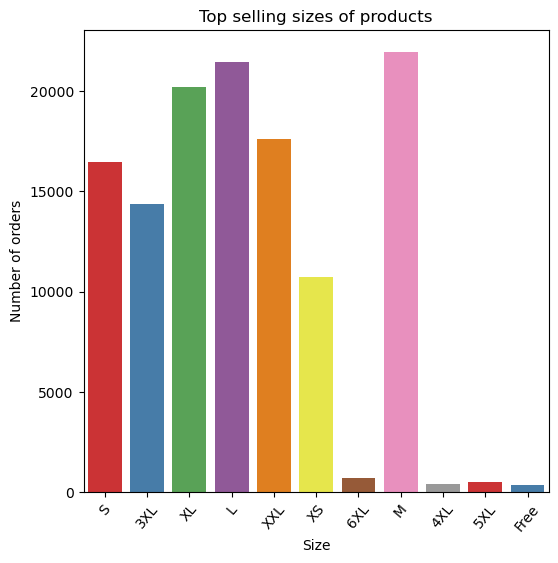

In [52]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Size'],data=df,palette='Set1')

plt.xlabel('Size')
plt.ylabel('Number of orders')
plt.title('Top selling sizes of products')
plt.xticks(rotation=50)

plt.show()


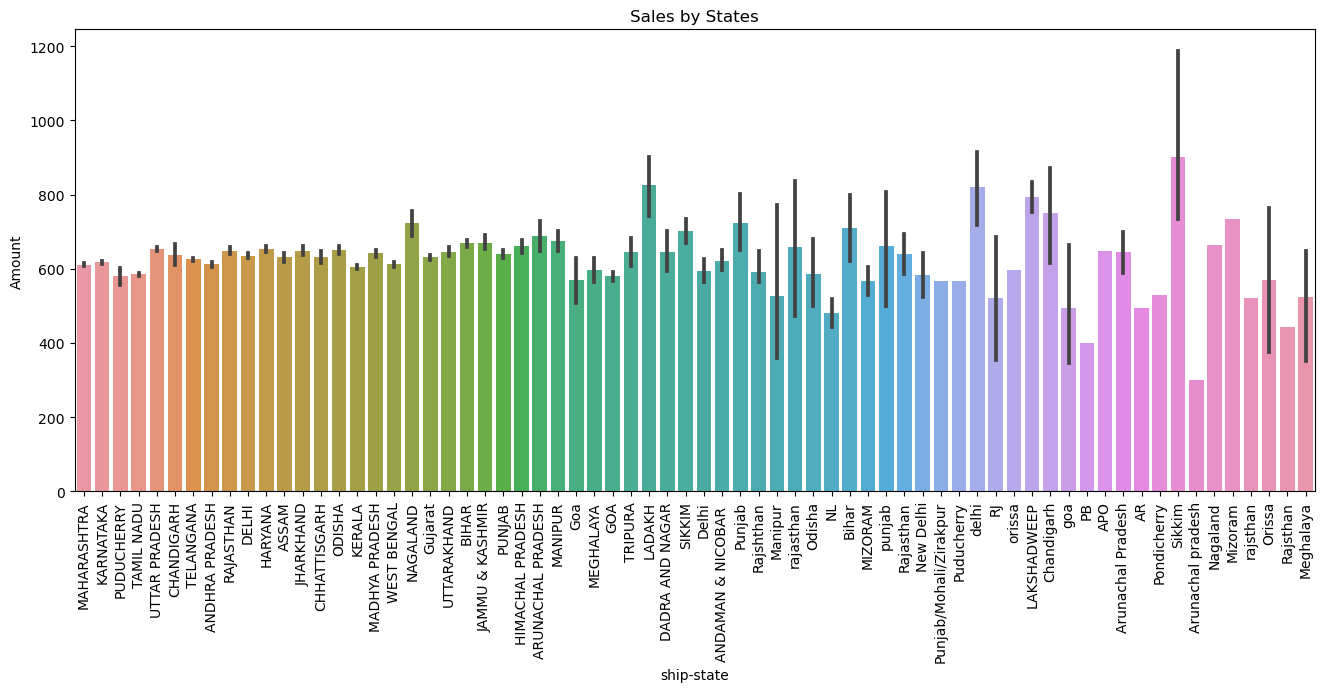

In [53]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df, y='Amount', x='ship-state')
plt.xticks(rotation=90)
plt.title('Sales by States')
plt.show()

# 

# 

In [54]:
fulfilment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
fulfilment_sales 

,Fulfilment,Total Sales
0,Amazon,5.411026e+07
1,Merchant,2.363751e+07


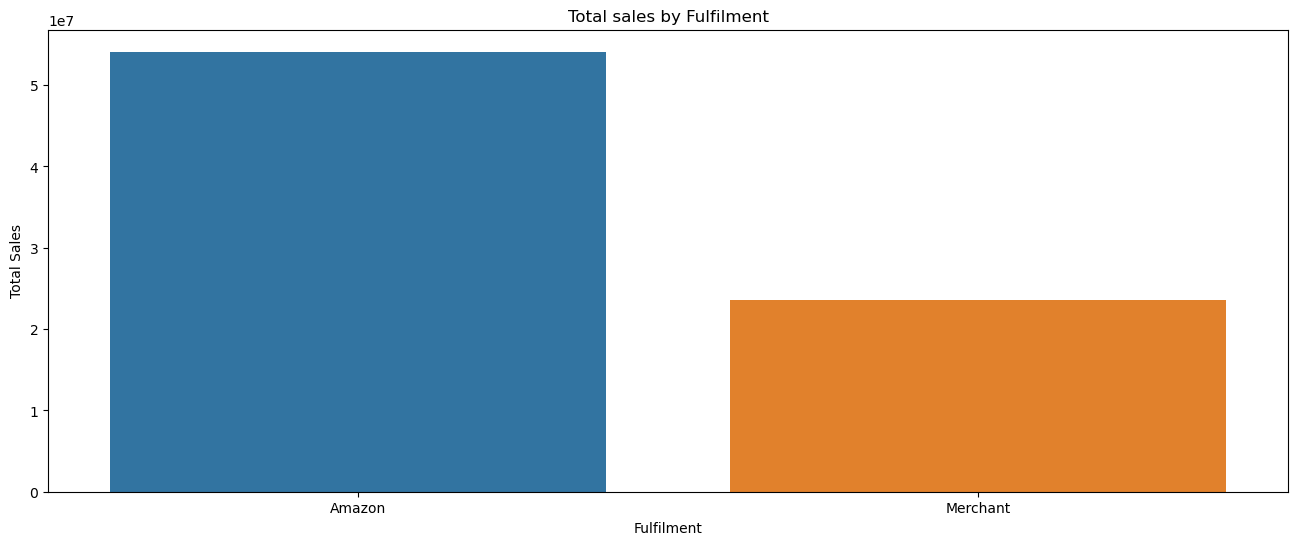

In [55]:
plt.figure(figsize=(16, 6))
sns.barplot(data=fulfilment_sales, x='Fulfilment', y='Total Sales')
plt.title('Total sales by Fulfilment')
plt.show()

In [56]:
b2b_sales_category = df[df['B2B'] == True].groupby('Category')['Amount'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
b2b_sales_category = b2b_sales_category.reset_index(drop=True)
b2b_sales_category

,Category,Total Sales
0,Set,241821.009042
1,kurta,163177.163183
2,Western Dress,85004.527324
3,Top,33240.561465
4,Ethnic Dress,12682.190000
5,Blouse,3143.000000
6,Saree,1651.000000
7,Bottom,1595.670000


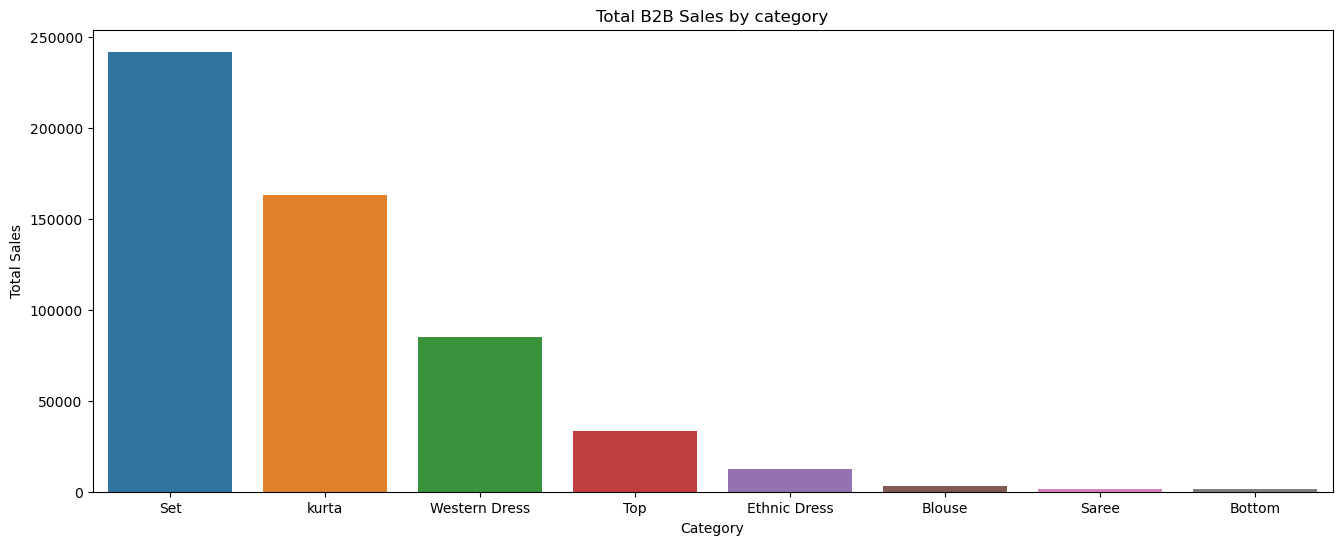

In [57]:
plt.figure(figsize=(16, 6))
sns.barplot(data=b2b_sales_category, x='Category', y='Total Sales')
plt.title('Total B2B Sales by category')
plt.show()

In [58]:
print(df.columns.tolist())


['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-country', 'B2B', 'fulfilled-by']


In [61]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df.columns = df.columns.str.strip()


categorical_columns = ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 
                       'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'currency', 
                       'ship-city', 'ship-state', 'ship-country', 'fulfilled-by']


for col in categorical_columns:
    if col in df.columns:  
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column {col} not found in DataFrame")


df.head()


,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by
0,2022-04-30,0,1,0,1,1340,6932,5,7,5526,1,0,0,647.62,4726,28,0,False,0
1,2022-04-30,5,1,0,1,845,4385,8,0,5244,1,1,0,406.00,764,23,0,False,0
2,2022-04-30,3,0,0,0,531,2582,8,8,675,1,1,0,329.00,5275,28,0,True,0
3,2022-04-30,0,1,0,1,371,1722,7,5,4607,1,0,0,753.33,6047,43,0,False,0
4,2022-04-30,3,0,0,0,752,3786,6,0,4320,1,1,0,574.00,1445,56,0,False,0


In [62]:
from sklearn.model_selection import train_test_split


In [63]:

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['dayofyear'] = df['Date'].dt.dayofyear

df.drop(columns=['Date'], inplace=True)


In [64]:
X = df.drop(columns='Amount')
y = df['Amount'] #target
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


        Status  Fulfilment  Sales Channel  ship-service-level  Style   SKU  \
0            0           1              0                   1   1340  6932   
1            5           1              0                   1    845  4385   
2            3           0              0                   0    531  2582   
3            0           1              0                   1    371  1722   
4            3           0              0                   0    752  3786   
...        ...         ...            ...                 ...    ...   ...   
128970       3           0              0                   0    772  3902   
128971       3           0              0                   0   1350  7001   
128972       3           0              0                   0    236   993   
128973       3           0              0                   0    120   413   
128974       3           0              0                   0    111   348   

        Category  Size  ASIN  Courier Status  ...  ship-city  s

In [65]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (99838, 22)
Test set size: (24960, 22)


In [66]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)


               feature  importance
6             Category    0.397498
5                  SKU    0.159711
4                Style    0.121917
8                 ASIN    0.104752
21           dayofyear    0.046266
9       Courier Status    0.032246
1           Fulfilment    0.026899
12           ship-city    0.024523
19                 day    0.018236
13          ship-state    0.014979
10                 Qty    0.014811
3   ship-service-level    0.010479
20           dayofweek    0.009622
7                 Size    0.008665
0               Status    0.005318
18               month    0.002170
2        Sales Channel    0.001846
15                 B2B    0.000062
16        fulfilled-by    0.000000
17                year    0.000000
14        ship-country    0.000000
11            currency    0.000000


In [67]:
from sklearn.feature_selection import SelectKBest, f_regression


In [68]:
selector = SelectKBest(score_func=f_regression, k=10) 
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]

print("Selected features:")
print(selected_features)


Selected features:
Index(['ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'B2B',
       'month', 'day', 'dayofyear'],
      dtype='object')


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
print("Linear Regression R^2 Score:", linear_reg.score(X_test_scaled, y_test))

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
print("Decision Tree Regressor R^2 Score:", decision_tree_reg.score(X_test, y_test))

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
print("Random Forest Regressor R^2 Score:", random_forest_reg.score(X_test, y_test))




Linear Regression R^2 Score: 0.29659558906462546
Decision Tree Regressor R^2 Score: 0.6850758965922359
Random Forest Regressor R^2 Score: 0.8174693604001462


In [71]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train_scaled, y_train)
print("SVR R^2 Score:", svr.score(X_test_scaled, y_test))

# Gradient Boosting Regressor
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train)
print("Gradient Boosting Regressor R^2 Score:", gradient_boost.score(X_test, y_test))

SVR R^2 Score: 0.3565155920757609
Gradient Boosting Regressor R^2 Score: 0.6690393127842595


In [77]:
from joblib import dump
dump(random_forest_reg, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [78]:
from joblib import load

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

loaded_model = load('random_forest_model.joblib')
y_pred = loaded_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"R^2 Score: {r2}")



R^2 Score: 0.8174693604001462


In [79]:
df['Category'].unique()

array([5, 8, 7, 6, 3, 1, 4, 0, 2], dtype=int64)

# Predict sales for each category

In [80]:
categories = df['Category'].unique()
category_predictions = {}


for category in categories:

    category_data = df[df['Category'] == category].drop(columns='Amount')
    
    
    predictions = rf.predict(category_data)
    

    category_predictions[category] = predictions.mean()


print("Sales Predictions by Category:")
for category, prediction in category_predictions.items():
    print(f"Category {category}: Predicted Sales = ${prediction:.2f}")


Sales Predictions by Category:
Category 5: Predicted Sales = $769.13
Category 8: Predicted Sales = $466.39
Category 7: Predicted Sales = $749.87
Category 6: Predicted Sales = $528.08
Category 3: Predicted Sales = $705.57
Category 1: Predicted Sales = $373.76
Category 4: Predicted Sales = $774.92
Category 0: Predicted Sales = $524.78
Category 2: Predicted Sales = $330.71


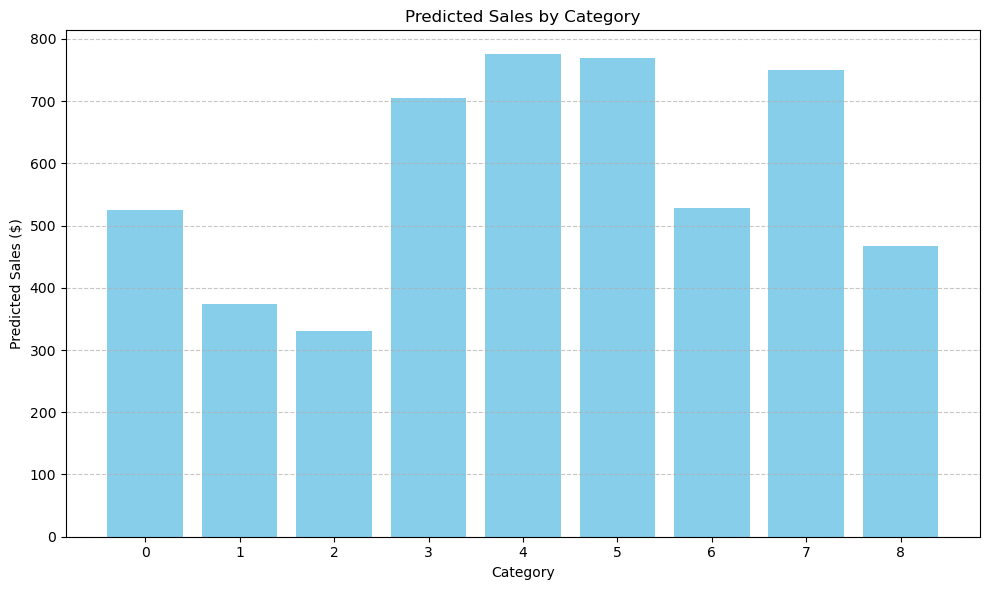

In [81]:
import matplotlib.pyplot as plt
categories = list(category_predictions.keys())
predictions = list(category_predictions.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, predictions, color='skyblue')


plt.xlabel('Category')
plt.ylabel('Predicted Sales ($)')
plt.title('Predicted Sales by Category')
plt.xticks(categories)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


#  Conclusion

This provides a method to predict sales for each category, revealing significant differences in sales potential across categories. These predictions can guide business strategies and help optimize resources, highlighting the value of category-specific analyses in making informed decisions.